# Problem Statement


The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

In [263]:
# importing the data
import pandas as pd
df=pd.read_csv(r"insurance.csv")

In [264]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [265]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [266]:
df.shape
# there are 1338 rows and 7 columns

(1338, 7)

In [267]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [268]:
#statistic of the numerical features
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [269]:
# checkimg for null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [270]:
# No null values are found in the dataset

In [271]:
#duplicate values
df.duplicated().sum()

1

In [272]:
#one duplicate value is found

In [273]:
df = df.drop_duplicates()

In [274]:
df.duplicated().sum()

0

In [275]:
# Checking the number of unique values of each column
df.nunique()


age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

# Insights

There is no null value in the dataset

There is a duplicate value in the dataset was found which I have dropped

The maximum age is 64 and minimum age is 18

The maximum expense is 63770 and minimum expense is 1121


# EDA

In [276]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [277]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'expenses']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [278]:
['age', 'bmi', 'children', 'expenses']
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring categoical features

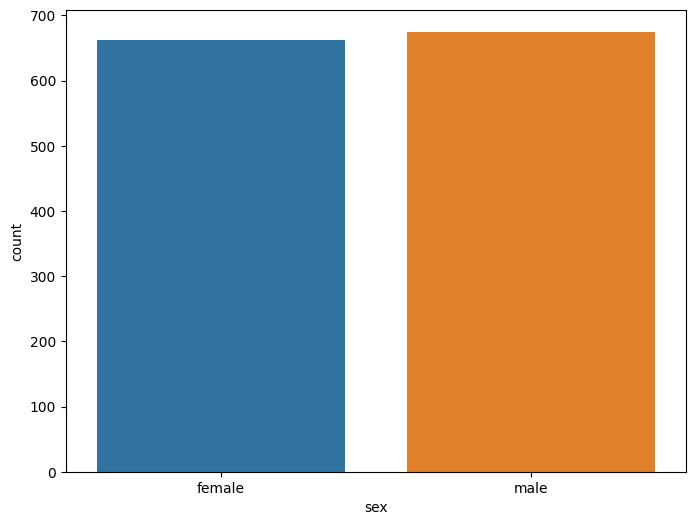

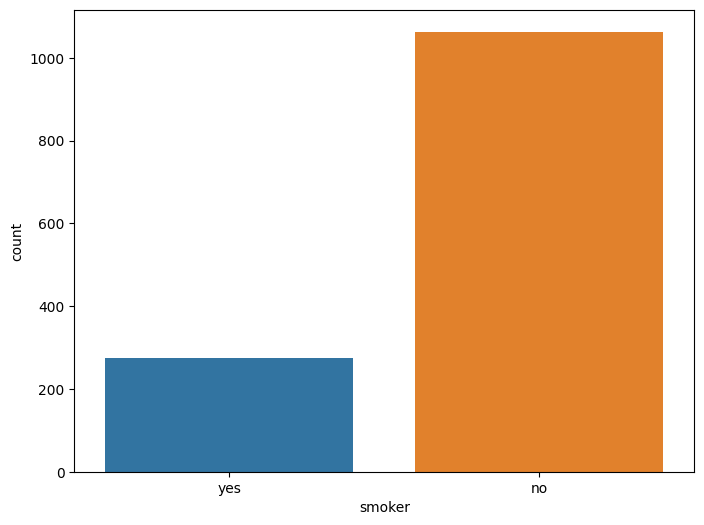

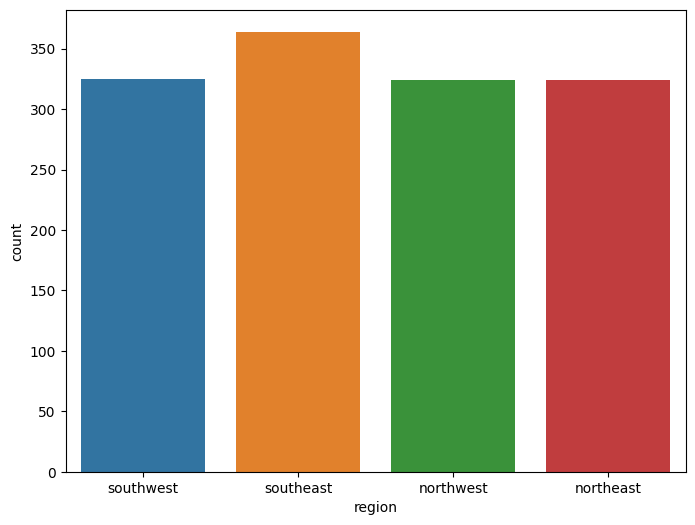

In [279]:
for i in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=i, data=df)
    plt.show()

Text(0, 0.5, 'count')

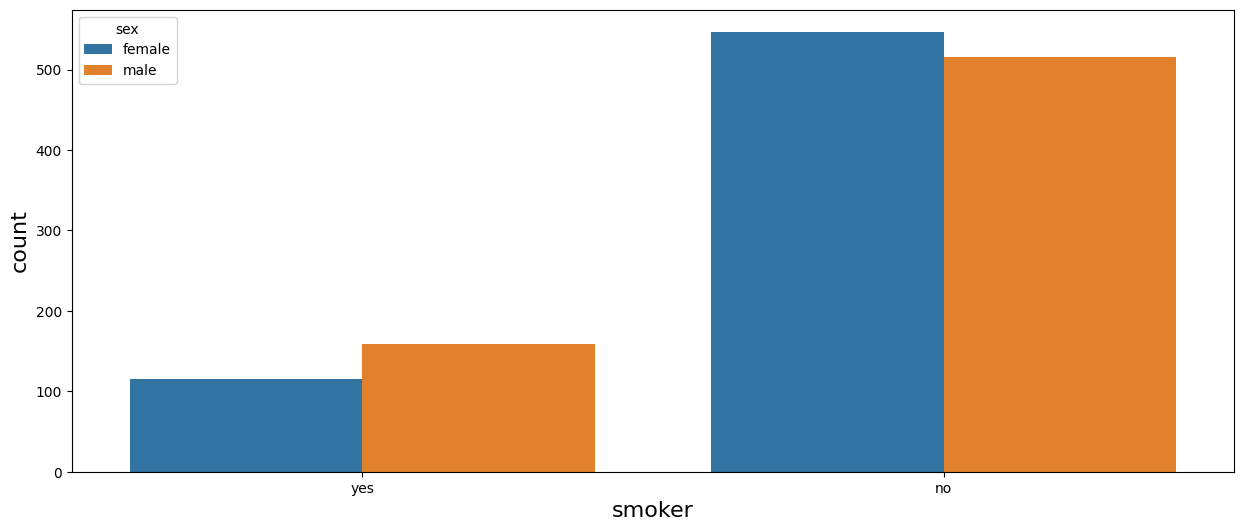

In [280]:
plt.figure(figsize=(15,6))
bp6=sns.countplot(x=df.smoker,hue=df.sex)
bp6.set_xlabel("smoker", fontsize=16)
bp6.set_ylabel("count", fontsize=16)

In [281]:
# we see that the data-set has equal number of male and female 
# Non smoker are more than smokers
# southeast has a little higher number in comparison to rest
# Male smokers are more compared to female

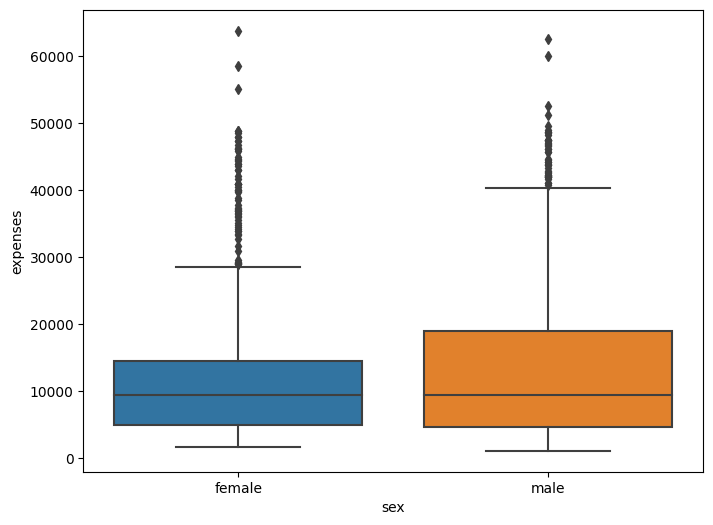

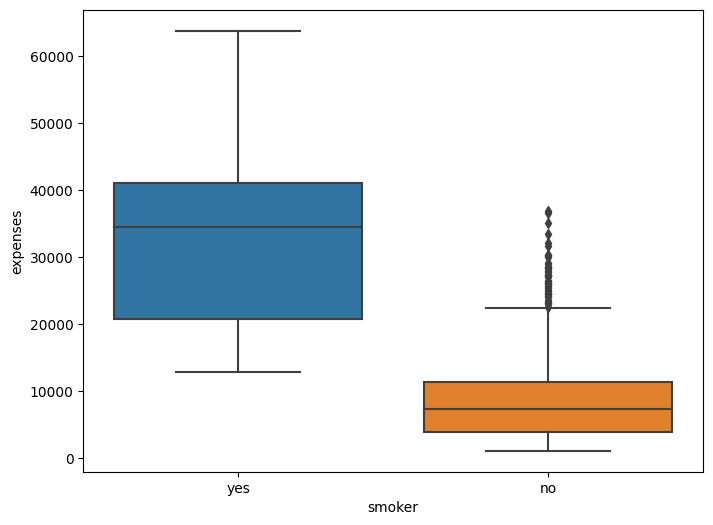

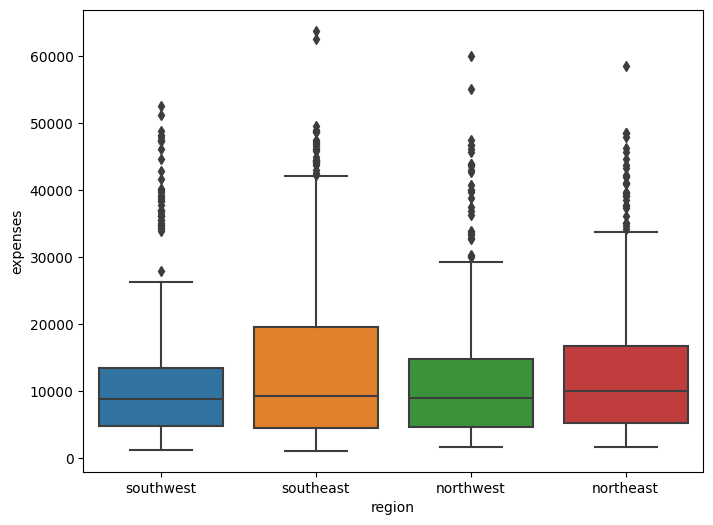

In [282]:
for i in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=i, y='expenses', data=df)
    plt.show()

In [283]:
# a number of outliers are also present

In [284]:
expenses_by_sex = df.groupby('sex')['expenses'].mean().reset_index()
print(expenses_by_sex)

      sex      expenses
0  female  12569.578897
1    male  13974.999111


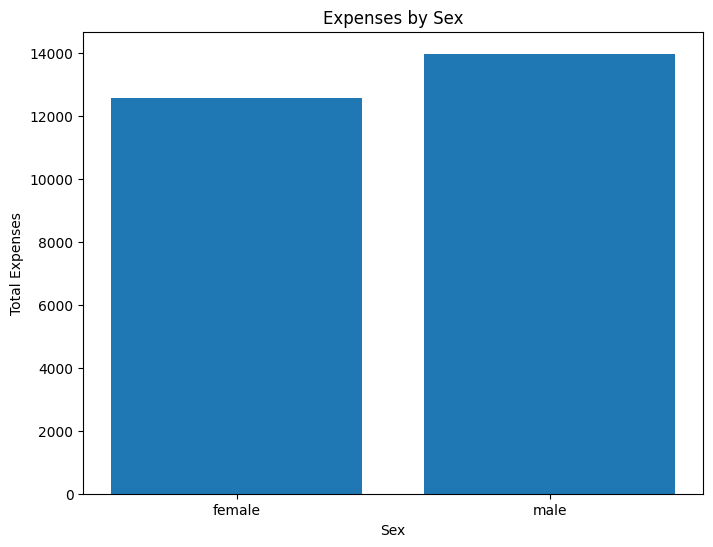

In [285]:
plt.figure(figsize=(8, 6))
plt.bar(expenses_by_sex['sex'], expenses_by_sex['expenses'])
plt.title('Expenses by Sex')
plt.xlabel('Sex')
plt.ylabel('Total Expenses')
plt.show()

In [286]:
# male spend a bit higher than female 

In [287]:
expenses_by_smokingcategory = df.groupby('smoker')['expenses'].mean().reset_index()
print(expenses_by_smokingcategory)
expenses_by_smokingcategory

  smoker      expenses
0     no   8440.660461
1    yes  32050.231971


,smoker,expenses
0,no,8440.660461
1,yes,32050.231971


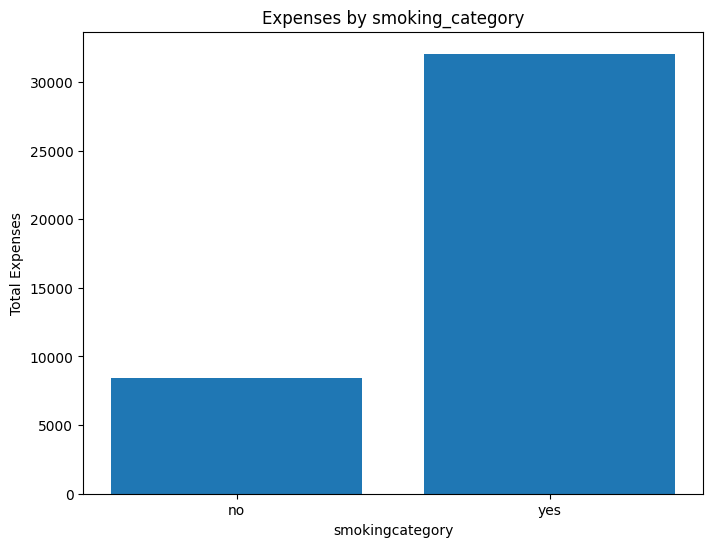

In [288]:
plt.figure(figsize=(8, 6))
plt.bar(expenses_by_smokingcategory['smoker'], expenses_by_smokingcategory['expenses'])
plt.title('Expenses by smoking_category')
plt.xlabel('smokingcategory')
plt.ylabel('Total Expenses')
plt.show()

In [289]:
# smoker have higher expenses than non smoker

In [290]:
expenses_by_region = df.groupby('region')['expenses'].mean().reset_index()
print(expenses_by_region)


      region      expenses
0  northeast  13406.384691
1  northwest  12450.840648
2  southeast  14735.411538
3  southwest  12346.937908


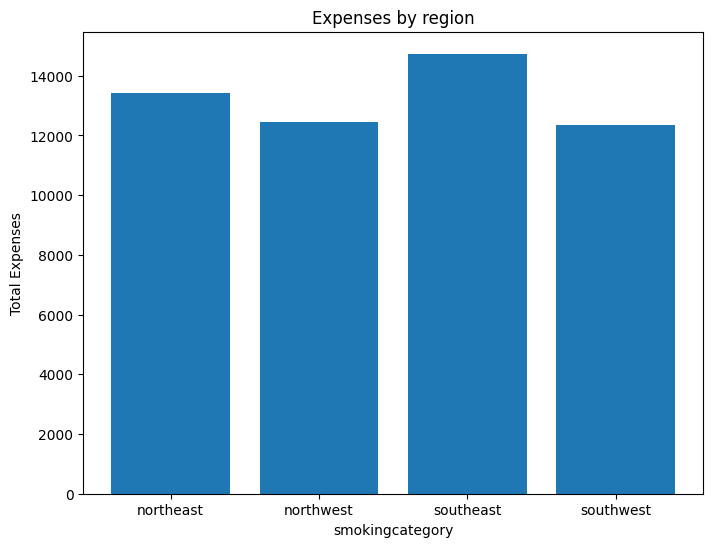

In [291]:
plt.figure(figsize=(8, 6))
plt.bar(expenses_by_region['region'], expenses_by_region['expenses'])
plt.title('Expenses by region')
plt.xlabel('smokingcategory')
plt.ylabel('Total Expenses')
plt.show()

In [292]:
# southeast spends the most followed by northeast then northwest and southwest

# Exploring nuemerical features

In [293]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [294]:
numeric_features

['age', 'bmi', 'children', 'expenses']

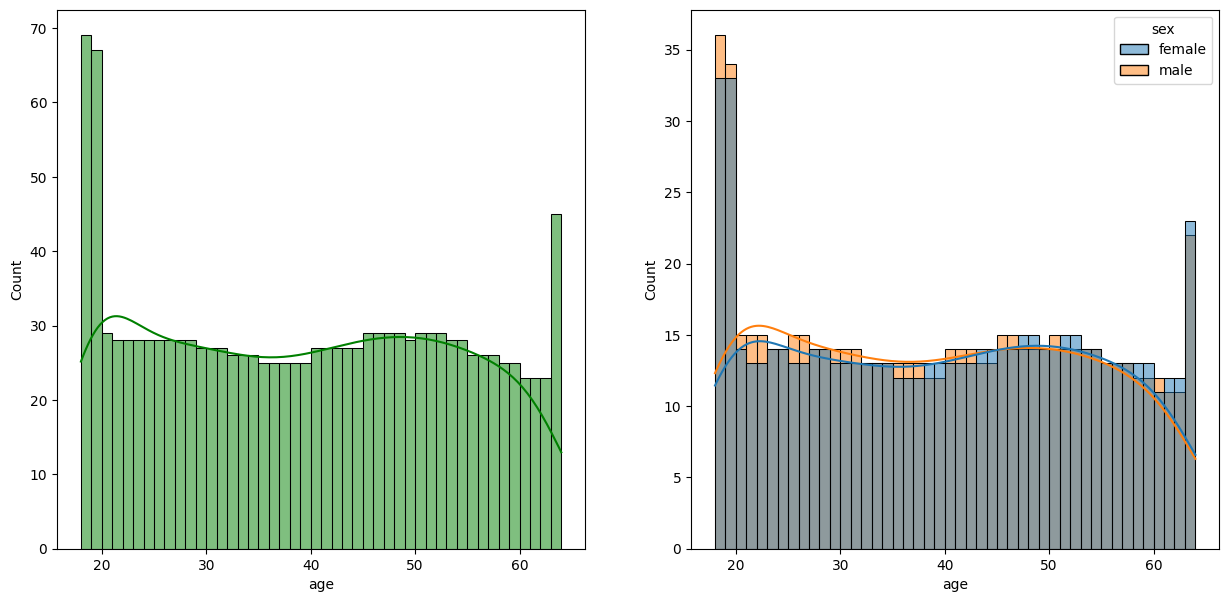

In [295]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='age',bins=46,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='age',bins=46,kde=True,hue='sex')
plt.show()

In [296]:
# most of the age has same number of people except in the 18 aand 19 and at 65

In [297]:
No_of_children = df.groupby('children')['expenses'].mean().reset_index()
print(No_of_children)

   children      expenses
0         0  12384.695515
1         1  12731.171821
2         2  15073.564000
3         3  15355.318535
4         4  13850.656800
5         5   8786.035556


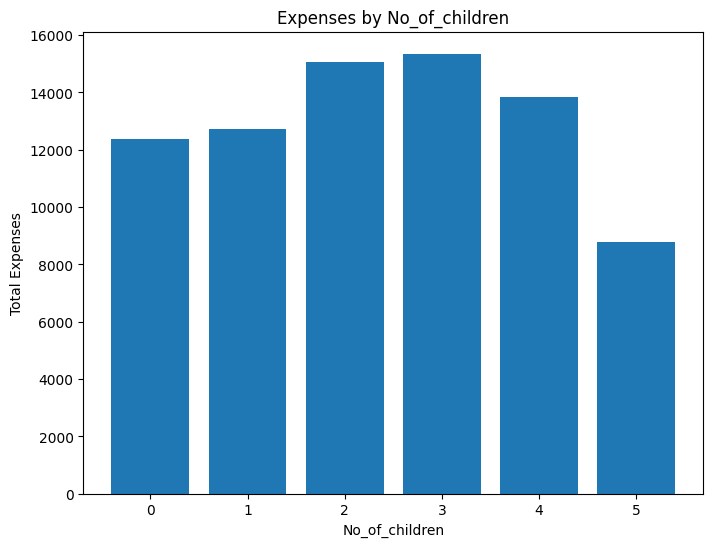

In [298]:
plt.figure(figsize=(8, 6))
plt.bar(No_of_children['children'], No_of_children['expenses'])
plt.title('Expenses by No_of_children')
plt.xlabel('No_of_children')
plt.ylabel('Total Expenses')
plt.show()

In [299]:
# If the number of children is either 2 or 3 the expense is more

/tmp/ipykernel_1125/1311172832.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(df['bmi'])


Text(0, 0.5, 'Frequency')

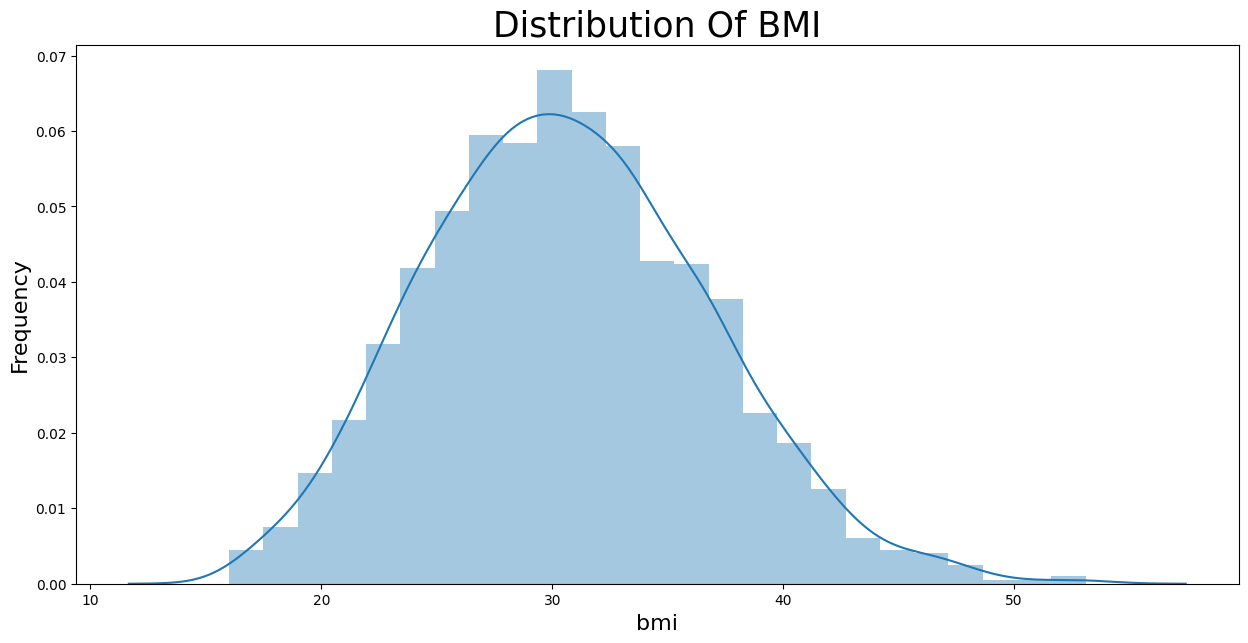

In [300]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of BMI",fontsize=25)
g=sns.distplot(df['bmi'])
g.set_xlabel("bmi", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)

In [301]:
# BMI follows gaussian distribution

<Axes: xlabel='bmi'>

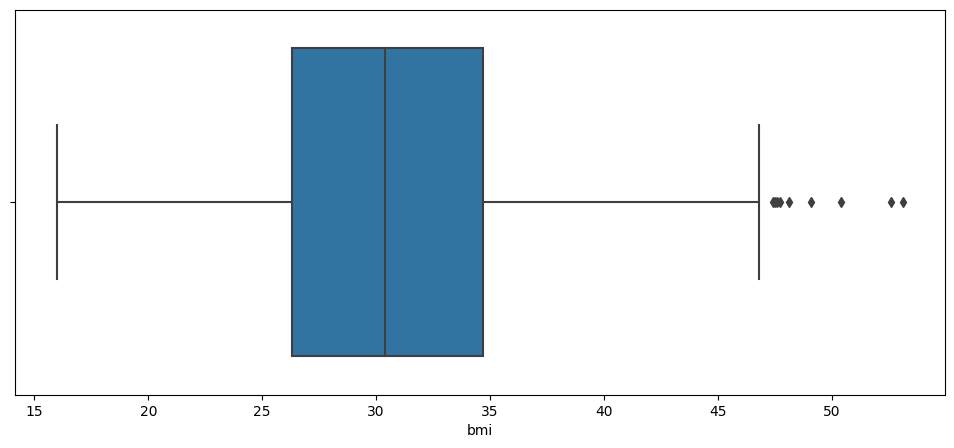

In [302]:
plt.figure(figsize=(12,5))
sns.boxplot(x='bmi',data=df)

<Axes: xlabel='expenses'>

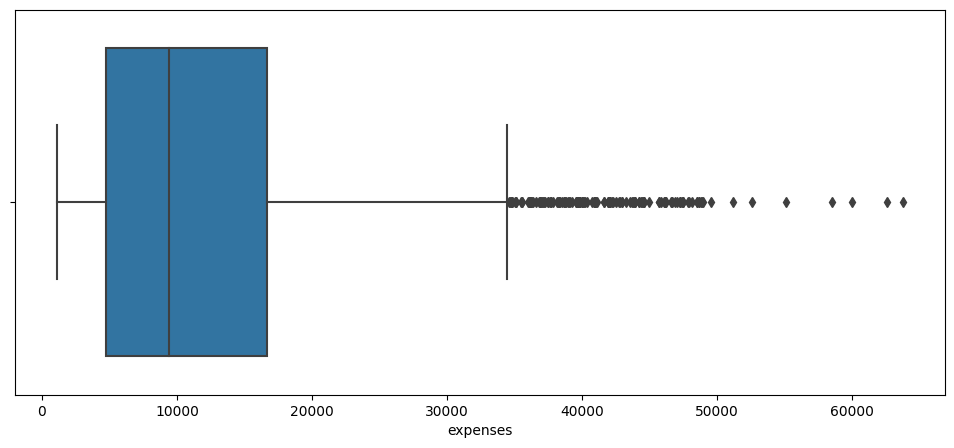

In [303]:
plt.figure(figsize=(12,5))
sns.boxplot(x='expenses',data=df)


In [304]:
#outliers are present

Text(0, 0.5, 'Expenses')

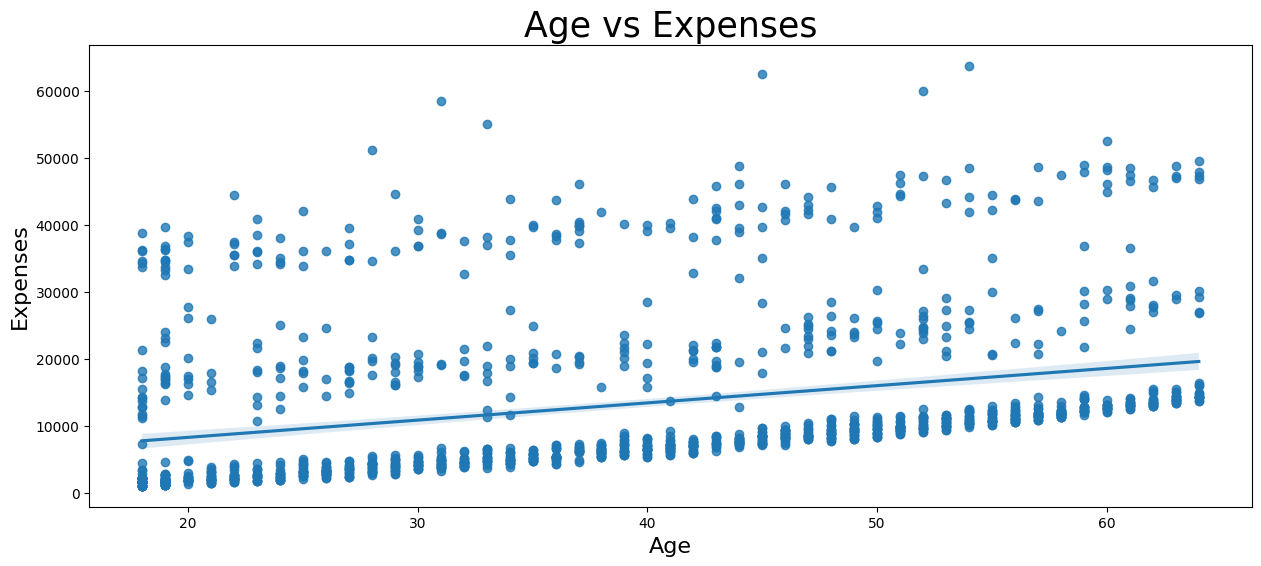

In [305]:
plt.figure(figsize=(15,6))
plt.title("Age vs Expenses",fontsize=25)
bp7=sns.regplot(x='age',y='expenses',data=df)
bp7.set_xlabel("Age", fontsize=16)
bp7.set_ylabel("Expenses", fontsize=16)

Text(0, 0.5, 'expenses')

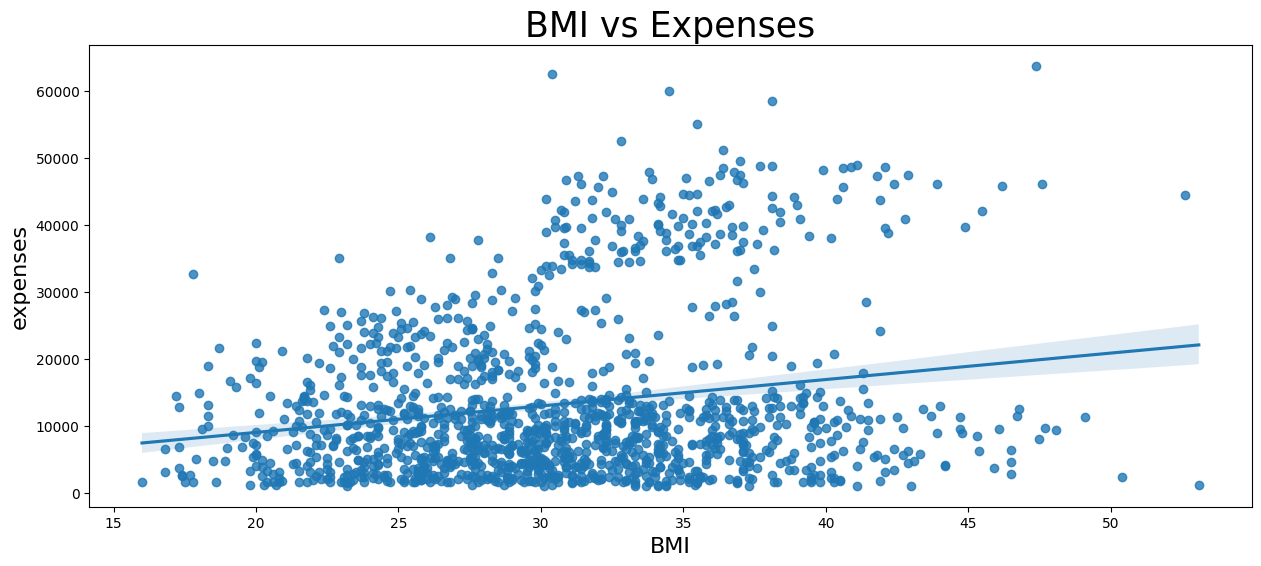

In [306]:
plt.figure(figsize=(15,6))
plt.title("BMI vs Expenses",fontsize=25)
bp8=sns.regplot(x='bmi',y='expenses',data=df)
bp8.set_xlabel("BMI", fontsize=16)
bp8.set_ylabel("expenses", fontsize=16)

Text(0, 0.5, 'expenses')

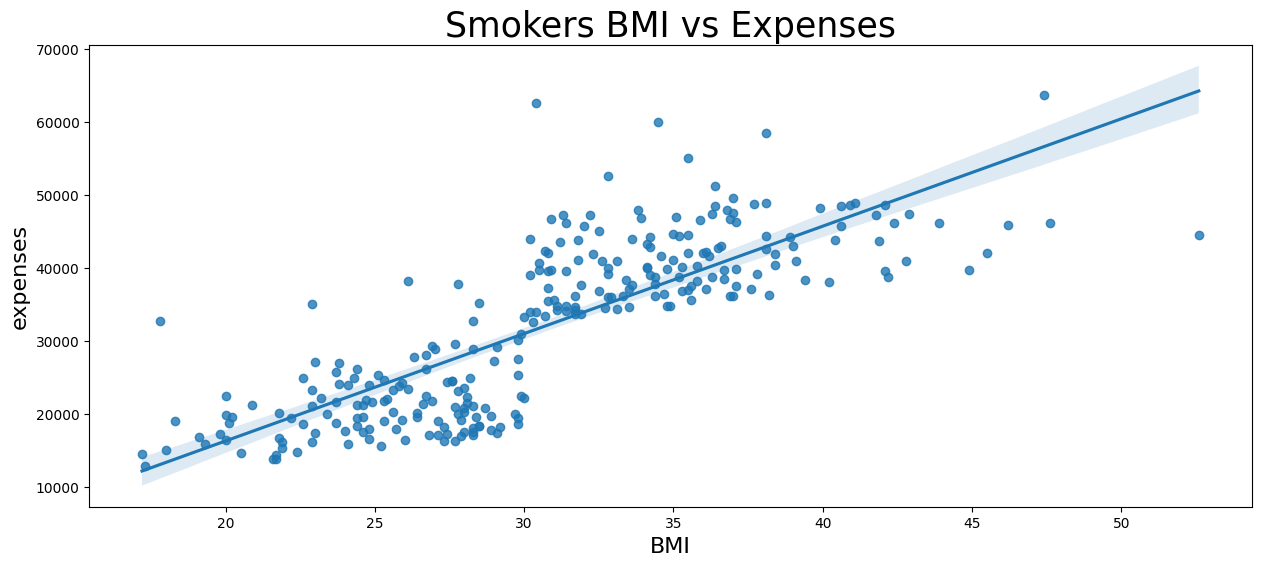

In [307]:
#smokers bmi vs expenses
plt.figure(figsize=(15,6))
plt.title("Smokers BMI vs Expenses",fontsize=25)
smokers_bmi=df[df['smoker']=='yes']
bp9=sns.regplot(x='bmi',y='expenses',data=smokers_bmi)
bp9.set_xlabel("BMI", fontsize=16)
bp9.set_ylabel("expenses", fontsize=16)

Text(0, 0.5, 'Expenses')

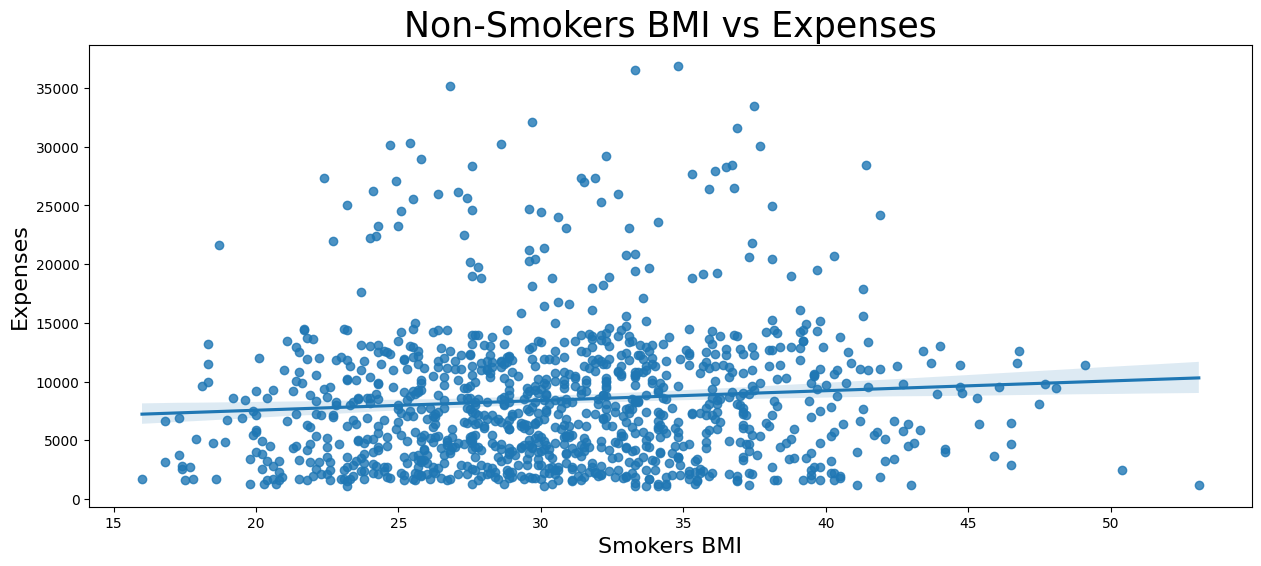

In [308]:
#non smokers bmi vs expenses
plt.figure(figsize=(15,6))
plt.title("Non-Smokers BMI vs Expenses",fontsize=25)
non_smokers_bmi=df[df['smoker']=='no']
bp10=sns.regplot(x='bmi',y='expenses',data=non_smokers_bmi)
bp10.set_xlabel("Smokers BMI", fontsize=16)
bp10.set_ylabel("Expenses", fontsize=16)

expenses increases with respect to bmi if the person is smoker

In [309]:
#changing categorical_featues to nuemrical

In [310]:
# Ordinal encoding
smoker=(df['smoker']=='yes')
nonsmoker=(df['smoker']=='no')
df.loc[smoker,'smoker']=1
df.loc[nonsmoker,'smoker']=0

In [311]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,0,northwest,10600.55
1334,18,female,31.9,0,0,northeast,2205.98
1335,18,female,36.9,0,0,southeast,1629.83
1336,21,female,25.8,0,0,southwest,2007.95


In [312]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_sex = encoder.fit_transform(df[['sex']])
sex_categories = encoder.categories_[0]
new_columns = ['sex_' + category for category in sex_categories]
# Create a DataFrame from the encoded values with the new column names
df_encoded = pd.DataFrame(encoded_sex, columns=new_columns)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'sex' column
df.drop('sex', axis=1, inplace=True)
df 

/config/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,bmi,children,smoker,region,expenses,sex_female,sex_male
0,19.0,27.9,0.0,1,southwest,16884.92,1.0,0.0
1,18.0,33.8,1.0,0,southeast,1725.55,0.0,1.0
2,28.0,33.0,3.0,0,southeast,4449.46,0.0,1.0
3,33.0,22.7,0.0,0,northwest,21984.47,0.0,1.0
4,32.0,28.9,0.0,0,northwest,3866.86,0.0,1.0
...,...,...,...,...,...,...,...,...
1334,18.0,31.9,0.0,0,northeast,2205.98,1.0,0.0
1335,18.0,36.9,0.0,0,southeast,1629.83,1.0,0.0
1336,21.0,25.8,0.0,0,southwest,2007.95,1.0,0.0
1337,61.0,29.1,0.0,1,northwest,29141.36,NaN,NaN
